# Project 3: Polynomial Regression

In this project you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an array and a degree and return a dataframe where each column is the array to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the array column 2 is the array squared and column 3 is the array cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous projects.

# Write a polynomial function

we're going to write a polynomial function that takes an array and a maximal degree and returns a dataframe with columns containing the array to all the powers up to the maximal degree.

In [1]:
import numpy as np
import pandas as pd

tmp = np.array([1., 2., 3.])
tmp_cubed = tmp**3
print (tmp)
print (tmp_cubed)

[1. 2. 3.]
[ 1.  8. 27.]


We can create an empty datarame using pd.DataFrame() and then add any columns to it with ex_df['column_name'] = value. For example we create an empty dataframe and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [2]:
ex_df = pd.DataFrame()
ex_df['power_1'] = tmp
print (ex_df)

   power_1
0      1.0
1      2.0
2      3.0


Using the hints above complete the following function to create a dataframe consisting of the powers of an array up to a specific degree:

In [3]:
def polynomial_df(feature, degree):
    # assume that degree >= 1
    # initialize the dataframe:
    # your code
    poly_df = pd.DataFrame()
    # and set poly_df['power_1'] equal to the passed feature
    # your code
    poly_df['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        # your code
        for power in range (2,degree+1):
            # first we'll give the column a name:
            # your code
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            # your code
            poly_df[name] = feature ** power
    return poly_df

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [4]:
print (polynomial_df(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# your code
# load the data, preprocess it as what you did before
df = pd.read_csv('santa_clara_county.csv')

To demonstrate polynomial regression, we use ['SQUARE FEET'] as the feature. Later, for plotting purposes (connecting the dots), you'll need to sort by the values of SQUARE FEET. For houses with identical square footage, we break the tie by their prices.

In [7]:
# your code
# sort the data
result = df.sort_values(by=['SQUARE FEET','PRICE'],)
feature = result['SQUARE FEET'].fillna(0)
result['PRICE']=result['PRICE'].fillna(0)

Let's start with a degree 1 polynomial using 'SQUARE FEET' (i.e. a line) to predict 'PRICE' and plot what it looks like (same as simple regression)

In [8]:
input_features = polynomial_df(feature, 1)

In [9]:
from sklearn.linear_model import LinearRegression
# your code
lm = LinearRegression()
lm.fit(input_features,result['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
#Function of printing outcomes using coefficients, intercept and input_features, reuse the code from Project 2
# your code
lm.coef_

array([382.75488488])

In [11]:
# your code
print ("The coefficient for power_1 is ", str(lm.coef_))
print ("The intercept is ", str(lm.intercept_))

The coefficient for power_1 is  [382.75488488]
The intercept is  47491.96147088648


Use matplotlib to plot the raw data and the fitting curve for model_1. Let's unpack that plt.plot() command. The first pair of arrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'.

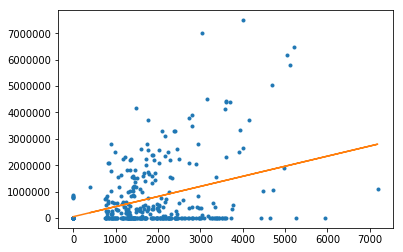

In [12]:
# your code
plt.plot(input_features,result['PRICE'],'.',
        input_features,lm.predict(input_features),'-')

We can see, not surprisingly, that the predicted values all fall on a line. What if we wanted to plot a second degree polynomial?

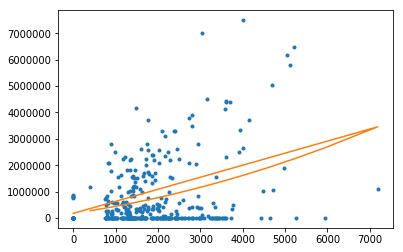

In [13]:
# your code
input_features = polynomial_df(feature, 2)
lm = LinearRegression()
lm.fit(input_features,result['PRICE'])
plt.plot(input_features['power_1'],result['PRICE'],'.',
        input_features['power_1'],lm.predict(input_features),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

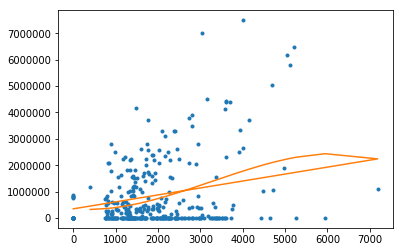

In [14]:
# your code
input_features = polynomial_df(feature, 3)
lm = LinearRegression()
lm.fit(input_features,result['PRICE'])
plt.plot(input_features['power_1'],result['PRICE'],'.',
        input_features['power_1'],lm.predict(input_features),'-')

Now try a 15th degree polynomial:

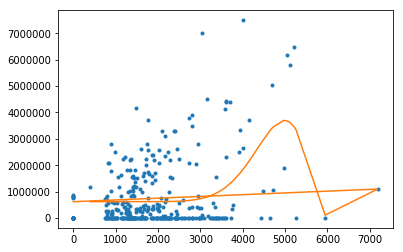

In [15]:
# your code
input_features = polynomial_df(feature, 15)
lm = LinearRegression()
lm.fit(input_features,result['PRICE'])
plt.plot(input_features['power_1'],result['PRICE'],'.',
        input_features['power_1'],lm.predict(input_features),'-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

In [16]:
# the 15th degree polynomial line is over-fitting, which is not appropriate.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients and plot the resulting fit (as we did above). 

To split the sales data into four subsets, we perform the following steps:
First split sales into 2 subsets with 50/50 split.
Next split the resulting subsets into 2 more subsets each with 50/50.
You should end up with 4 subsets (set_1, set_2, set_3, set_4) of approximately equal size. Sort them as you did for the intial dataframe.

In [17]:
# your code
from sklearn.model_selection import train_test_split
subset_1,subset_2,subresult_1,subresult_2 = train_test_split(feature,result['PRICE'],test_size = 0.5,random_state = 0)
set_1,set_2,set_result_1,set_result_2 = train_test_split(subset_1,subresult_1,test_size = 0.5,random_state = 0)
set_3,set_4,set_result_3,set_result_4= train_test_split(subset_2,subresult_2,test_size = 0.5,random_state = 0)

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [18]:
# your code    
def coef(coefficients,intercept,input_features):
    n=len(input_features)
    for i in range(0,n):
        print ('The coefficient for '+ input_features[i]+' is '+ str(coefficients[i]))
    print ('The intercept is '+ str(intercept))

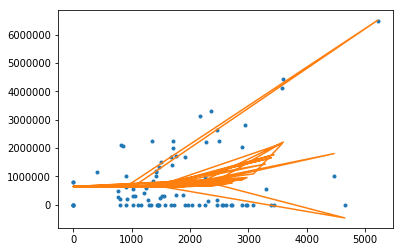

In [20]:
# your code
input_features_1= polynomial_df(set_1, 15)
lm.fit(input_features_1,set_result_1)
plt.plot(input_features_1['power_1'],set_result_1,'.',
        input_features_1['power_1'],lm.predict(input_features_1),'-')

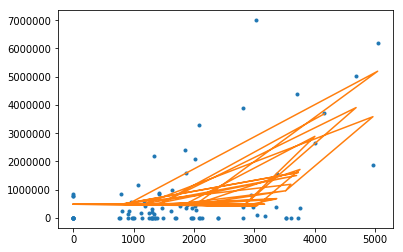

In [24]:
input_features_2= polynomial_df(set_2, 15)
lm.fit(input_features_2,set_result_2)
plt.plot(input_features_2['power_1'],set_result_2,'.',
        input_features_2['power_1'],lm.predict(input_features_2),'-')

In [22]:
# your code

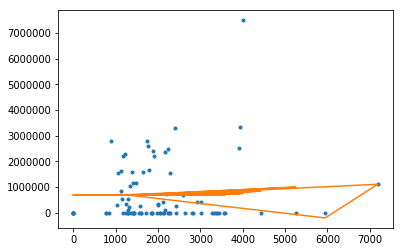

In [25]:
input_features_3= polynomial_df(set_3, 15)
lm.fit(input_features_3,set_result_3)

plt.plot(input_features_3['power_1'],set_result_3,'.',
        input_features_3['power_1'],lm.predict(input_features_3),'-')

The coefficient for power_1 is 2.4874532611e-73
The coefficient for power_2 is 3.56204306851e-37
The coefficient for power_3 is -1.65197723749e-42
The coefficient for power_4 is 4.79163404016e-47
The coefficient for power_5 is 1.46370621076e-67
The coefficient for power_6 is 2.3159103218e-55
The coefficient for power_7 is 4.58612470602e-52
The coefficient for power_8 is 1.28328344045e-48
The coefficient for power_9 is 3.29836195447e-45
The coefficient for power_10 is 7.45428319883e-42
The coefficient for power_11 is 1.35423509985e-38
The coefficient for power_12 is 1.54476184204e-35
The coefficient for power_13 is -9.49042372407e-39
The coefficient for power_14 is 1.94062915797e-42
The coefficient for power_15 is -1.31983785288e-46
The intercept is 1008132.54083


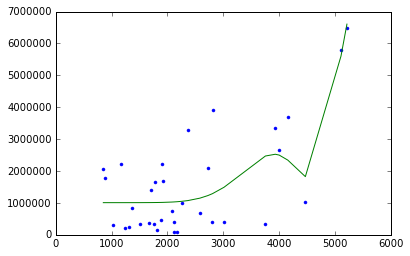

In [44]:
# your code

In [26]:
input_features_4= polynomial_df(set_4, 15)
lm.fit(input_features,set_result_4)
plt.plot(input_features_4['power_1'],set_result_4,'.',
        input_features_4['power_1'],lm.predict(input_features_4),'-')

ValueError: Found input variables with inconsistent numbers of samples: [350, 88]

The coefficient for power_1 is 1.28490590428e-71
The coefficient for power_2 is 1.44111805143e-36
The coefficient for power_3 is 4.80565465811e-41
The coefficient for power_4 is -9.6659324644e-46
The coefficient for power_5 is -2.13821176807e-50
The coefficient for power_6 is 6.89415067893e-54
The coefficient for power_7 is 9.00743710503e-51
The coefficient for power_8 is 2.21965777841e-47
The coefficient for power_9 is 5.05974043417e-44
The coefficient for power_10 is 1.01998237629e-40
The coefficient for power_11 is 1.66055525631e-37
The coefficient for power_12 is 1.70385858997e-34
The coefficient for power_13 is -1.15943934503e-37
The coefficient for power_14 is 2.60847779791e-41
The coefficient for power_15 is -1.94244707256e-45
The intercept is 1105631.87009


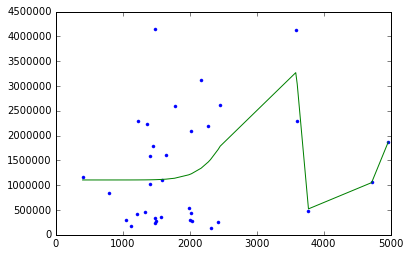

In [45]:
# your code

Now plot all 4 sets of data and fitting together.

In [ ]:
plt.plot(input_features_1['power_1'],set_result_1,'.',
        input_features_1['power_1'],lm.predict(input_features_1),'-'
        input_features_2['power_1'],set_result_2,'.',
        input_features_2['power_1'],lm.predict(input_features_2),'-'
        input_features_3['power_1'],set_result_3,'.',
        input_features_3['power_1'],lm.predict(input_features_3),'-'
        input_features_4['power_1'],set_result_4,'.',
        input_features_4['power_1'],lm.predict(input_features_4),'-')

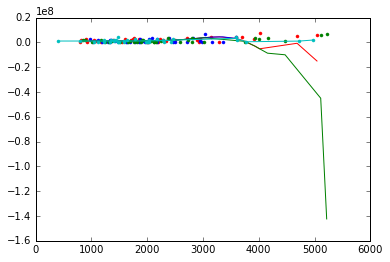

In [48]:
# your code

What do you think of the model?

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set (we will practice on other ways in later projects).

We split the sales dataset 3-way into training set, test set, and validation set as follows:
* Split our sales data into 2 sets: training_and_validation and testing. Use 90/10 split.
* Further split our training data into two sets: training and validation. Use 50/50 split.

In [62]:
training_and_validation,testing,training_and_validation_result,testing_result = train_test_split(feature,result['PRICE'],test_size = 0.1,random_state = 0)
traning_data,validation_data,traning_data_result,validation_data_result = train_test_split(training_and_validation,training_and_validation_result,test_size = 0.5,random_state = 0)

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python use range(1, 15+1))
  * Build a dataframe of polynomial data of train_data['SQUARE FEET'] at the current degree
  * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
  * Add train_data['PRICE'] to the polynomial dataframe
  * Learn a polynomial regression model to sqft vs price with that degree on train_data
  * Compute the RSS on valid_data for that degree and you will need to make a polynmial dataframe using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)


In [63]:
# your code
rss_result = []
for degree in range(1, 16):    
    train_data_poly = polynomial_df(train_data['SQUARE FEET'], degree)
    poly_data['PRICE'] = train_data['PRICE']
    model = lm.fit(train_data_poly,poly_data['price'])
    
    test_data_poly = polynomial_df(test_data['SQUARE FEET'], degree)
    predictions = lm.predict(test_data_poly)
    residuals = test_data['PRICE'] - predictions
    rss_test = sum(residuals * residuals)
    rss_result.append(rss_test)
    print (degree,rss_result)

(1, 80671135129992.12)
(2, 77256303739500.92)
(3, 78484019868398.75)
(4, 80756159283984.62)
(5, 79597867526007.2)
(6, 77745126618664.52)
(7, 75964952482739.97)
(8, 74343919815362.8)
(9, 73499455155803.75)
(10, 74206520608129.78)
(11, 76748772244634.61)
(12, 80667846196713.36)
(13, 84833003255724.95)
(14, 88008278667090.3)
(15, 89596153249563.27)


Now plot the result as RSS from validation data vs. degree of polynomial. 

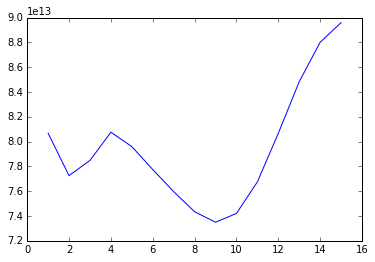

In [58]:
# your code
plt.plot(degree,rss_result)

Which degree shows the lowest RSS from validation data set?

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on test data.

In [64]:
# your code
print [min(result_rssud)]

1.79762212586e+13
